In [ ]:
# !pip install -U mlx mlx-vlm
# !pip install -U transformers

In [2]:
import json

from mlx_vlm import apply_chat_template, generate, load
from pdf2image import convert_from_path

In [3]:
model_path = "mlx-community/olmOCR-7B-0225-preview-6bit"
model, processor = load(model_path)
config = model.config

/Users/ljoana/.pyenv/versions/ml/lib/python3.11/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


In [4]:
pdf_path = "../pdfs/ass_2.pdf"

In [5]:
images = convert_from_path(pdf_path)
images

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2131>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2131>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2131>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2131>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2131>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2131>]

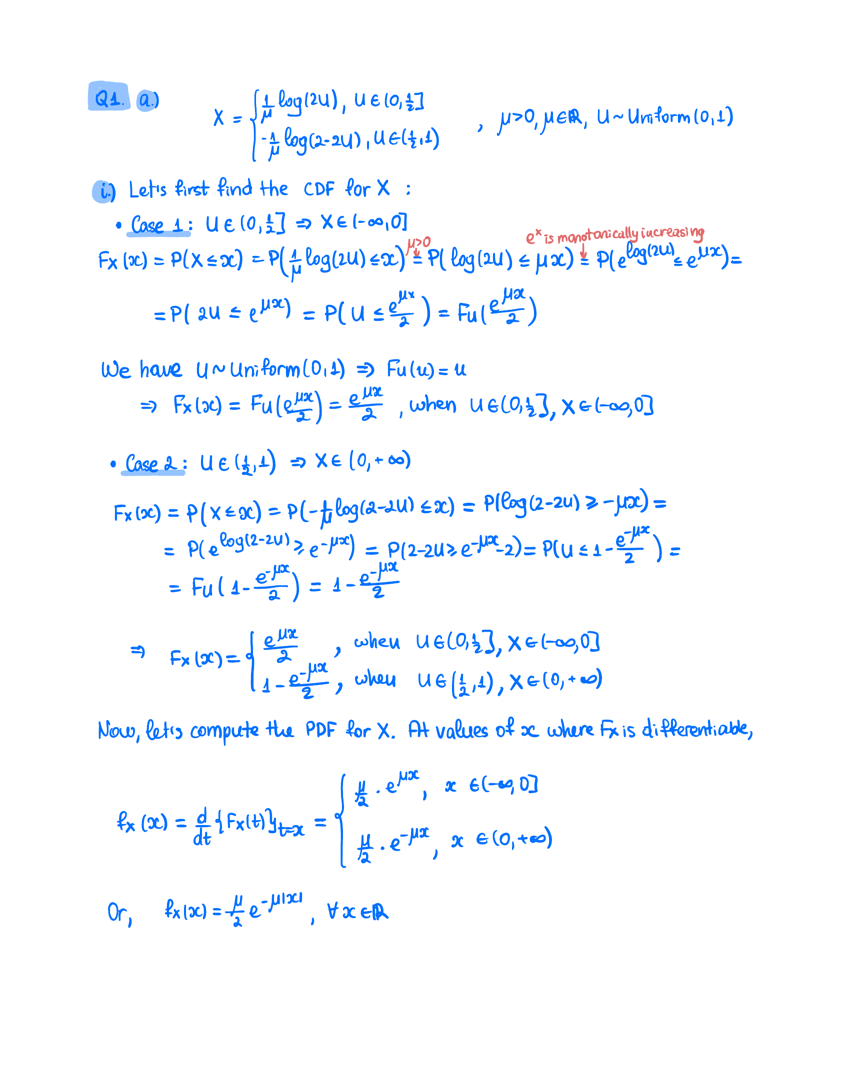

In [6]:
image = images[0].resize((1700 // 2, 2131 // 2))
image

In [7]:
prompt = (
    f"Below is the image of one page of a handwritten math document. "
    f"Just return the plain text representation of this document as if you were reading it naturally.\n"
    f"Do not hallucinate.\n"
)
prompt

'Below is the image of one page of a handwritten math document. Just return the plain text representation of this document as if you were reading it naturally.\nDo not hallucinate.\n'

In [8]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt},
            {
                "type": "image_url",
                "image_url": {"url": f"data:image/png;base64,{image}"},
            },
        ],
    }
]

In [9]:
messages

[{'role': 'user',
  'content': [{'type': 'text',
    'text': 'Below is the image of one page of a handwritten math document. Just return the plain text representation of this document as if you were reading it naturally.\nDo not hallucinate.\n'},
   {'type': 'image_url',
    'image_url': {'url': 'data:image/png;base64,<PIL.Image.Image image mode=RGB size=850x1065 at 0x384814290>'}}]}]

In [10]:
formatted_prompt = apply_chat_template(
    processor, config, messages, num_images=1,
)

In [11]:
output = generate(model, processor, formatted_prompt, image, verbose=True, max_tokens=2000)

Files: <PIL.Image.Image image mode=RGB size=850x1065 at 0x384814290> 

Prompt: <|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
[{'type': 'text', 'text': 'Below is the image of one page of a handwritten math document. Just return the plain text representation of this document as if you were reading it naturally.\nDo not hallucinate.\n'}, {'type': 'image_url', 'image_url': {'url': 'data:image/png;base64,<PIL.Image.Image image mode=RGB size=850x1065 at 0x384814290>'}}]<|vision_start|><|image_pad|><|vision_end|><|im_end|>
<|im_start|>assistant

{"primary_language":"en","is_rotation_valid":true,"rotation_correction":0,"is_table":false,"is_diagram":false,"natural_text":"Q1. a) \\[ X = \\begin{cases} \\frac{1}{\\mu} \\log(2u), & u \\in (0, \\frac{1}{2}] \\\\ -\\frac{1}{\\mu} \\log(2-2u), & u \\in (\\frac{1}{2}, 1) \\end{cases}, \\quad \\mu > 0, \\mu \\in \\mathbb{R}, \\quad U \\sim \\text{Uniform}(0,1) \\]\n\ni) Let's first find the CDF for \\( X \\):\n\n- **Case 1:

In [12]:
resp = json.loads(output[0])
resp

{'primary_language': 'en',
 'is_rotation_valid': True,
 'rotation_correction': 0,
 'is_table': False,
 'is_diagram': False,
 'natural_text': "Q1. a) \\[ X = \\begin{cases} \\frac{1}{\\mu} \\log(2u), & u \\in (0, \\frac{1}{2}] \\\\ -\\frac{1}{\\mu} \\log(2-2u), & u \\in (\\frac{1}{2}, 1) \\end{cases}, \\quad \\mu > 0, \\mu \\in \\mathbb{R}, \\quad U \\sim \\text{Uniform}(0,1) \\]\n\ni) Let's first find the CDF for \\( X \\):\n\n- **Case 1:** \\( U \\in (0, \\frac{1}{2}] \\Rightarrow X \\in (-\\infty, 0] \\)\n  \\[ F_X(x) = P(X \\leq x) = P\\left(\\frac{1}{\\mu} \\log(2u) \\leq x\\right) = P\\left(\\log(2u) \\leq \\mu x\\right) = P\\left(e^{\\log(2u)} \\leq e^{\\mu x}\\right) = P\\left(2u \\leq e^{\\mu x}\\right) = P\\left(U \\leq \\frac{e^{\\mu x}}{2}\\right) = F_U\\left(\\frac{e^{\\mu x}}{2}\\right) \\]\n\n  We have \\( U \\sim \\text{Uniform}(0,1) \\Rightarrow F_U(u) = u \\)\n  \\[ \\Rightarrow F_X(x) = F_U\\left(\\frac{e^{\\mu x}}{2}\\right) = \\frac{e^{\\mu x}}{2}, \\quad \\text{whe

In [13]:
print(resp["natural_text"])

Q1. a) \[ X = \begin{cases} \frac{1}{\mu} \log(2u), & u \in (0, \frac{1}{2}] \\ -\frac{1}{\mu} \log(2-2u), & u \in (\frac{1}{2}, 1) \end{cases}, \quad \mu > 0, \mu \in \mathbb{R}, \quad U \sim \text{Uniform}(0,1) \]

i) Let's first find the CDF for \( X \):

- **Case 1:** \( U \in (0, \frac{1}{2}] \Rightarrow X \in (-\infty, 0] \)
  \[ F_X(x) = P(X \leq x) = P\left(\frac{1}{\mu} \log(2u) \leq x\right) = P\left(\log(2u) \leq \mu x\right) = P\left(e^{\log(2u)} \leq e^{\mu x}\right) = P\left(2u \leq e^{\mu x}\right) = P\left(U \leq \frac{e^{\mu x}}{2}\right) = F_U\left(\frac{e^{\mu x}}{2}\right) \]

  We have \( U \sim \text{Uniform}(0,1) \Rightarrow F_U(u) = u \)
  \[ \Rightarrow F_X(x) = F_U\left(\frac{e^{\mu x}}{2}\right) = \frac{e^{\mu x}}{2}, \quad \text{when} \quad U \in (0, \frac{1}{2}], \quad X \in (-\infty, 0] \]

- **Case 2:** \( U \in (\frac{1}{2}, 1) \Rightarrow X \in (0, +\infty) \)
  \[ F_X(x) = P(X \leq x) = P\left(-\frac{1}{\mu} \log(2-2u) \leq x\right) = P\left(\log(2-2u)

In [14]:
import re

def enforce_dollar_delims(s):
    # Replace \[...\] with $$...$$
    s = re.sub(r'\\\[(.*?)\\\]', r'$$\1$$', s, flags=re.DOTALL)
    # Replace \(...\) with $\1$
    s = re.sub(r'\\\((.*?)\\\)', r'$\1$', s, flags=re.DOTALL)
    return s

fixed = enforce_dollar_delims(resp["natural_text"])

In [15]:
print(fixed)

Q1. a) $$ X = \begin{cases} \frac{1}{\mu} \log(2u), & u \in (0, \frac{1}{2}] \\ -\frac{1}{\mu} \log(2-2u), & u \in (\frac{1}{2}, 1) \end{cases}, \quad \mu > 0, \mu \in \mathbb{R}, \quad U \sim \text{Uniform}(0,1) $$

i) Let's first find the CDF for $ X $:

- **Case 1:** $ U \in (0, \frac{1}{2}] \Rightarrow X \in (-\infty, 0] $
  $$ F_X(x) = P(X \leq x) = P\left(\frac{1}{\mu} \log(2u) \leq x\right) = P\left(\log(2u) \leq \mu x\right) = P\left(e^{\log(2u)} \leq e^{\mu x}\right) = P\left(2u \leq e^{\mu x}\right) = P\left(U \leq \frac{e^{\mu x}}{2}\right) = F_U\left(\frac{e^{\mu x}}{2}\right) $$

  We have $ U \sim \text{Uniform}(0,1) \Rightarrow F_U(u) = u $
  $$ \Rightarrow F_X(x) = F_U\left(\frac{e^{\mu x}}{2}\right) = \frac{e^{\mu x}}{2}, \quad \text{when} \quad U \in (0, \frac{1}{2}], \quad X \in (-\infty, 0] $$

- **Case 2:** $ U \in (\frac{1}{2}, 1) \Rightarrow X \in (0, +\infty) $
  $$ F_X(x) = P(X \leq x) = P\left(-\frac{1}{\mu} \log(2-2u) \leq x\right) = P\left(\log(2-2u) \geq -\

# Result

Q1. a) $$ X = \begin{cases} \frac{1}{\mu} \log(2u), & u \in (0, \frac{1}{2}] \\ -\frac{1}{\mu} \log(2-2u), & u \in (\frac{1}{2}, 1) \end{cases}, \quad \mu > 0, \mu \in \mathbb{R}, \quad U \sim \text{Uniform}(0,1) $$

i) Let's first find the CDF for $ X $:

- **Case 1:** $ U \in (0, \frac{1}{2}] \Rightarrow X \in (-\infty, 0] $
  $$ F_X(x) = P(X \leq x) = P\left(\frac{1}{\mu} \log(2u) \leq x\right) = P\left(\log(2u) \leq \mu x\right) = P\left(e^{\log(2u)} \leq e^{\mu x}\right) = P\left(2u \leq e^{\mu x}\right) = P\left(U \leq \frac{e^{\mu x}}{2}\right) = F_U\left(\frac{e^{\mu x}}{2}\right) $$

  We have $ U \sim \text{Uniform}(0,1) \Rightarrow F_U(u) = u $
  $$ \Rightarrow F_X(x) = F_U\left(\frac{e^{\mu x}}{2}\right) = \frac{e^{\mu x}}{2}, \quad \text{when} \quad U \in (0, \frac{1}{2}], \quad X \in (-\infty, 0] $$

- **Case 2:** $ U \in (\frac{1}{2}, 1) \Rightarrow X \in (0, +\infty) $
  $$ F_X(x) = P(X \leq x) = P\left(-\frac{1}{\mu} \log(2-2u) \leq x\right) = P\left(\log(2-2u) \geq -\mu x\right) = P\left(2-2u \geq e^{-\mu x}\right) = P\left(U \leq 1 - \frac{e^{-\mu x}}{2}\right) = F_U\left(1 - \frac{e^{-\mu x}}{2}\right) = 1 - \frac{e^{-\mu x}}{2} $$

  $$ \Rightarrow F_X(x) = \begin{cases} \frac{e^{\mu x}}{2}, & \text{when} \quad U \in (0, \frac{1}{2}], \quad X \in (-\infty, 0] \\ 1 - \frac{e^{-\mu x}}{2}, & \text{when} \quad U \in (\frac{1}{2}, 1), \quad X \in (0, +\infty) \end{cases} $$

Now, let's compute the PDF for $ X $. At values of $ x $ where $ F_X $ is differentiable,

$$ f_X(x) = \frac{d}{dx} F_X(x) = \begin{cases} \frac{\mu}{2} \cdot e^{\mu x}, & x \in (-\infty, 0] \\ \frac{\mu}{2} \cdot e^{-\mu x}, & x \in (0, +\infty) \end{cases} $$

Or, $$ f_X(x) = \frac{\mu}{2} e^{-\mu |x|}, \quad \forall x \in \mathbb{R} $$